Importing the required libraries

In [280]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import pandas as pd

When the disk is rotating at a fixed angular velocity

Defnining the constants

In [281]:
dt = 0.00001

_time = np.arange(0, 1, 0.00001)
_omega_o = 400 * np.pi
_omega_v = 2 * np.pi
_omega_delta = 10 * np.pi
_omega_t = _omega_o + _omega_delta * np.sin(_omega_v * _time)

_disp_t = _omega_t.cumsum() * dt # displacement in radians

for idx, i in enumerate(_disp_t):
    if np.mod(i, 2*np.pi) == 0.:
        print(i, idx, np.mod(i, 2*np.pi), _time[idx])

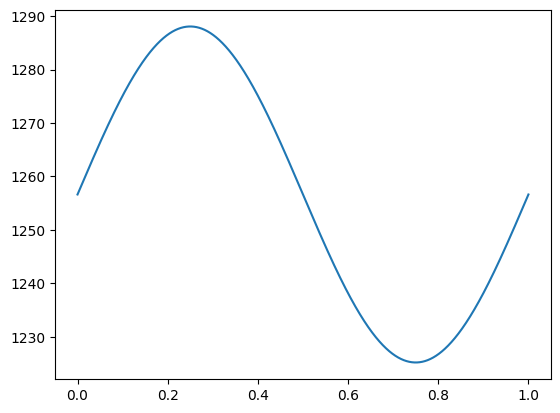

In [282]:
plt.plot(_time, _omega_t)

In [283]:
phi = 3.14

_w_omega_t = 400*np.pi*_time - 5*np.cos(2*np.pi*_time) +5
_w_omega_t = np.rad2deg(_w_omega_t)

for idx, i in enumerate(_w_omega_t):
    if np.mod(i, np.rad2deg(2*np.pi))<0.0199:
        pass
        # print(i, idx, np.mod(i, np.rad2deg(2*np.pi)), _time[idx])

In [284]:
# import numpy as np
import math
def find_nearest(array,value):
    idx = np.searchsorted(array, value, side="left")
    if idx > 0 and (idx == len(array) or math.fabs(value - array[idx-1]) < math.fabs(value - array[idx])):
        return array[idx-1]
    else:
        return idx

In [285]:
pulse = np.zeros(len(_time))

trigger = False
trigger_idx = 0
true_id = 0

for idx, i in enumerate(_w_omega_t):
    if np.mod(i, np.rad2deg(2*np.pi))==0:
        pulse[idx] = 1
        trigger = True
        trigger_idx = idx

    if idx < true_id:
        pulse[idx] = 1

    if trigger:
        val = _w_omega_t[idx] + 5
        true_id = find_nearest(_w_omega_t, val)


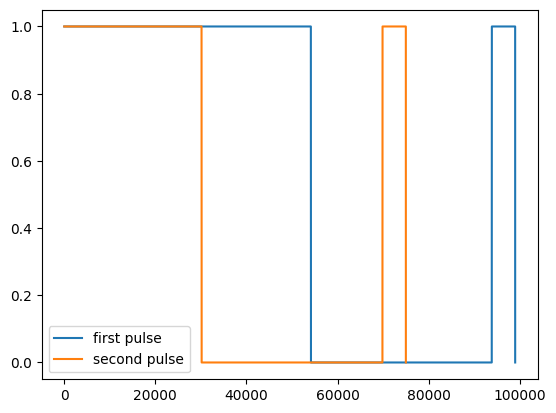

In [286]:
# plt.plot(_time, pulse)
adder = 100000
plt.plot(pulse[1000:1000 + adder], label = 'first pulse')
plt.plot(pulse[25000:25000+ adder], label='second pulse')
plt.legend()

In [287]:
_w_omega_t_lst = list(_omega_t)
max_value = max(_w_omega_t_lst)
max_index = _w_omega_t_lst.index(max_value)
print(max_value, max_index)

1288.0529879718151 25000


In [288]:
_est = np.zeros(len(_time))

t1 = 0

for idx, i in enumerate(_w_omega_t):
    if idx == 0:
        _est[idx] = 0
    if np.mod(i, np.rad2deg(2*np.pi)) <0.02 and idx != 0:
        print(_time[idx] - t1)
        _est[idx] = 2*np.rad2deg(np.pi)/(_time[idx] - t1)
        t1 = _time[idx]
    else:
        _est[idx] = _est[idx-1]
    

0.029930000000000002
0.24058000000000002
0.08310000000000001
0.17348999999999998


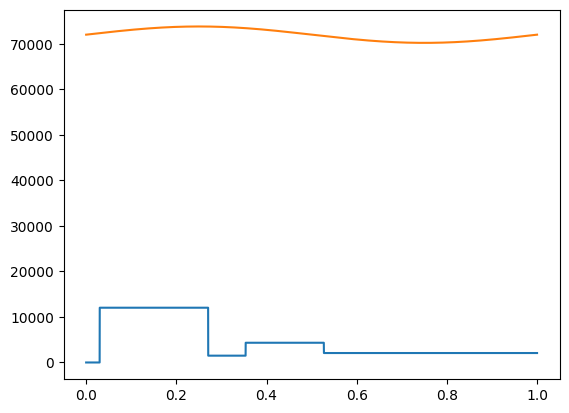

In [289]:
plt.plot(_time, _est, label = 'actual')
plt.plot(_time, np.rad2deg(_omega_t))

In [290]:
# _est = np.zeros(len(_time))
_est

array([   0.        ,    0.        ,    0.        , ..., 2075.04755317,
       2075.04755317, 2075.04755317])

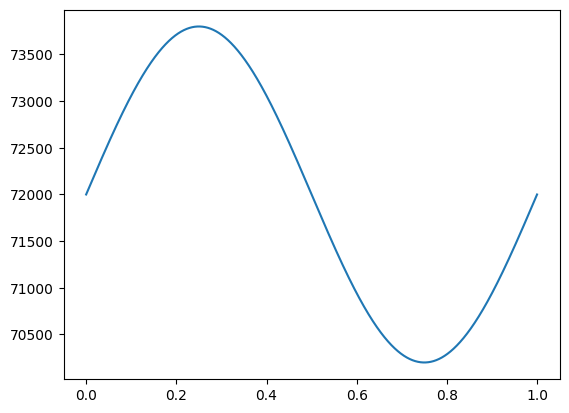

In [291]:
plt.plot(_time, np.rad2deg(_omega_t))

In [292]:
_sample_clicks = np.zeros(len(_time))

for i in range(len(_time)):

    if np.mod(i, 5000) == 0:
        _sample_clicks[i] = _omega_t[i]
    else:
        _sample_clicks[i] = np.nan

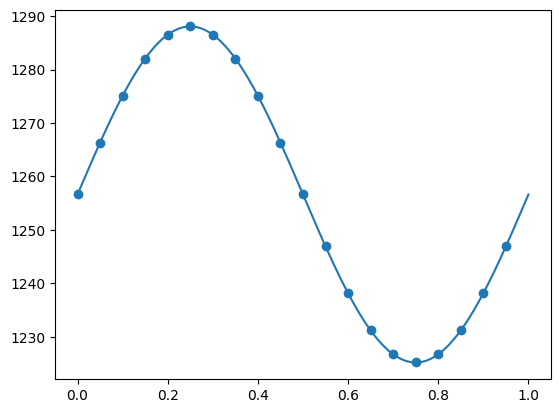

In [293]:
plt.scatter(_time, _sample_clicks)
plt.plot(_time, _omega_t)

In [294]:
_new_time = np.arange(0, 1, 0.1)
_x_labels = []
for i in _new_time:
    vall = 20*np.pi*_new_time - 5*np.cos(2*np.pi*_new_time) +5
    # vall = np.rad2deg(vall)
    _x_labels.append(vall)


In [300]:
_sample_clicks = np.zeros(len(_time))

for i in range(len(_time)):

    if np.mod(i, 10000) == 0:
        _sample_clicks[i] = _omega_o + _omega_delta * np.sin(_omega_v * _time[i])
    else:
        _sample_clicks[i] = np.nan

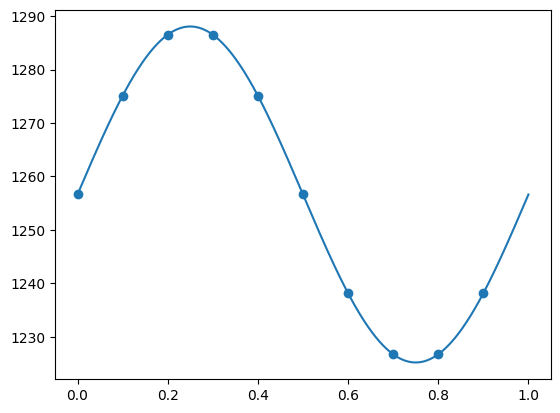

In [301]:
plt.scatter(_time, _sample_clicks)
plt.plot(_time, _omega_t)

In [297]:
np.rad2deg(6.31)

361.5363687275494

In [298]:
np.rad2deg(2*np.pi + 0.96)

415.00394833255905

In [299]:
vall = 20*np.pi*0.5 - 5*np.cos(2*np.pi*0.5) +5
np.rad2deg(vall)

2372.9577951308233